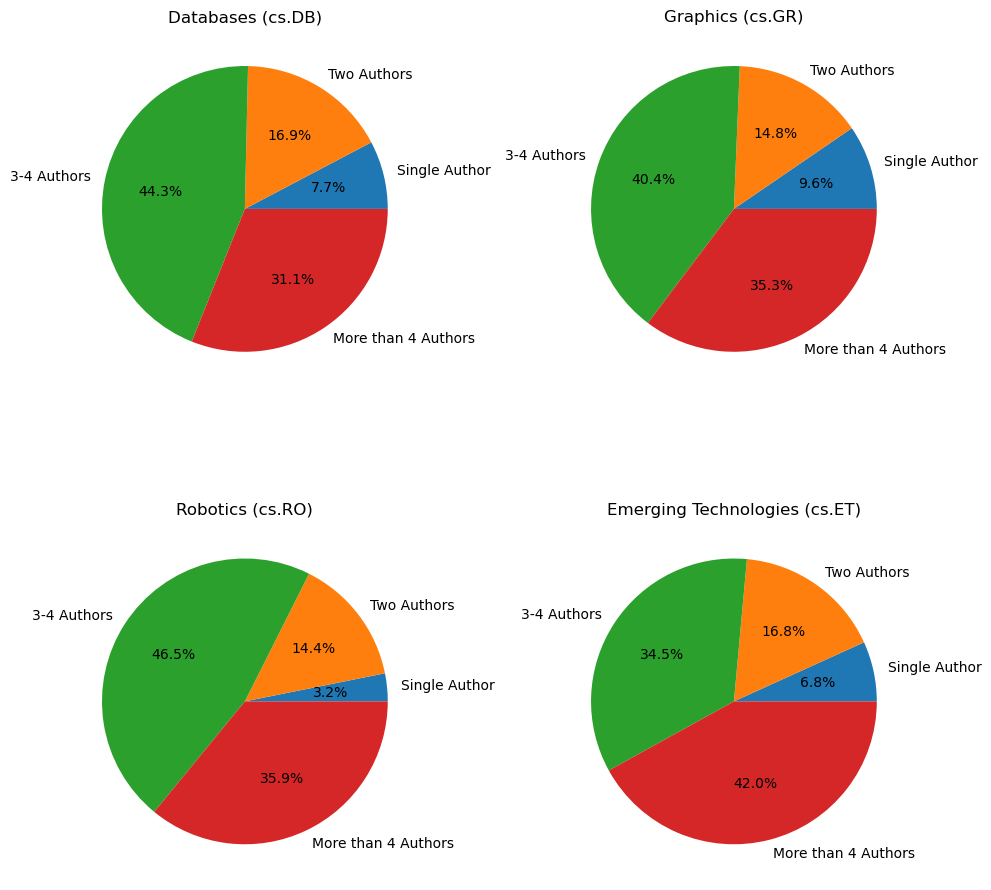

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the stored data into a dataframe
data = pd.read_csv('papers.csv')

# Filter the dataframe for each primary category
db_df = data[data['primary_category'] == 'cs.DB']
gr_df = data[data['primary_category'] == 'cs.GR']
ro_df = data[data['primary_category'] == 'cs.RO']
et_df = data[data['primary_category'] == 'cs.ET']

# Function to calculate the percentage of papers based on author count
def calculate_author_percentage(data):
    # Counting the number of papers with different author counts
    single_author_count = len(data[data['authors'].str.count(',') == 0])
    two_authors_count = len(data[data['authors'].str.count(',') == 1])
    three_four_authors_count = len(data[(data['authors'].str.count(',') >= 2) & (data['authors'].str.count(',') <= 3)])
    more_than_four_authors_count = len(data[data['authors'].str.count(',') > 3])
    
    # Calculating the total number of papers
    total_papers = single_author_count + two_authors_count + three_four_authors_count + more_than_four_authors_count

    percentages = [
        (single_author_count / total_papers) * 100,
        (two_authors_count / total_papers) * 100,
        (three_four_authors_count / total_papers) * 100,
        (more_than_four_authors_count / total_papers) * 100
    ]

    return percentages

# Calculate author percentages for each primary category
db_percentages = calculate_author_percentage(db_df)
gr_percentages = calculate_author_percentage(gr_df)
ro_percentages = calculate_author_percentage(ro_df)
et_percentages = calculate_author_percentage(et_df)

# Pie chart labels
labels = ['Single Author', 'Two Authors', '3-4 Authors', 'More than 4 Authors']

# Plotting pie charts
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.pie(db_percentages, labels=labels, autopct='%1.1f%%')
plt.title('Databases (cs.DB)')

plt.subplot(2, 2, 2)
plt.pie(gr_percentages, labels=labels, autopct='%1.1f%%')
plt.title('Graphics (cs.GR)')

plt.subplot(2, 2, 3)
plt.pie(ro_percentages, labels=labels, autopct='%1.1f%%')
plt.title('Robotics (cs.RO)')

plt.subplot(2, 2, 4)
plt.pie(et_percentages, labels=labels, autopct='%1.1f%%')
plt.title('Emerging Technologies (cs.ET)')

plt.tight_layout()
plt.show()